In [1]:
import pandas as pd
import jieba
import re
import matplotlib
import matplotlib.pyplot as plt
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pyLDAvis.gensim_models
import numpy as np

from pymongo import MongoClient
import pymongo

In [2]:
# 使用GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
! nvidia-smi

Thu Jun 23 13:54:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.129.06   Driver Version: 470.129.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 32%   40C    P8    21W / 260W |   1957MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 29%   

# LDA

## 2020 brief paragraph

In [3]:
file_cn = open("../LDA/segment/data/cn_file_brief_paragraph_2020.txt", "r")
cn_lines = file_cn.readlines()

# file_us = open("../MUSE-main/data/us_file_brief_p_paragraph.txt", "r")
# us_lines = file_us.readlines()

In [4]:
cn_desc = [i.replace(" \n","").split(" ") for i in cn_lines]
# us_desc = [i.replace(" \n","").split(" ") for i in us_lines]

In [5]:
id2word = corpora.Dictionary(cn_desc)
print('資料集字典：')
print(id2word)

資料集字典：
Dictionary(18848 unique tokens: ['一种', '人员', '人流量', '优先级', '传输']...)


In [6]:
corpus = [id2word.doc2bow(text) for text in cn_desc]
print('第一篇文章 corpus :')
print(corpus[0][:10])

第一篇文章 corpus :
[(0, 1), (1, 3), (2, 1), (3, 1), (4, 4), (5, 1), (6, 5), (7, 2), (8, 1), (9, 1)]


+ corpus = 文檔語料庫
+ id2word = 詞彙字典
+ num_topics = 生成幾個主題數
+ random_state = 固定亂數值，每次的模型結果會一樣
+ iteration = 每個文章訓練的次數，可以設定高一點讓模型收斂
+ passes(epoch) = 整個 corpus 訓練模型的次數
+ alpha = 文章主題分佈
+ eta = 主題字分佈

In [45]:
topic_num_list = np.arange(2, 41, 1)
result = []
for topic_num in topic_num_list:
    # perplexity
    tmp_ldamodel = gensim.models.ldamulticore.LdaMulticore(
        corpus = corpus,
        num_topics = topic_num ,
        id2word=id2word,
        random_state = 1500,
        passes=5,
        iterations=2000
        )
    tmp_perplexity = tmp_ldamodel.log_perplexity(corpus)
    temp_skleran = np.exp(-1. * tmp_perplexity)
    
    result.append({"topic_num": topic_num, "gensim_perplexity": tmp_perplexity, "perplexity":temp_skleran})
    print(topic_num)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


Process ForkPoolWorker-846:
Process ForkPoolWorker-845:
Process ForkPoolWorker-844:
Process ForkPoolWorker-850:
Process ForkPoolWorker-852:
Process ForkPoolWorker-854:
Process ForkPoolWorker-855:
Process ForkPoolWorker-853:
Process ForkPoolWorker-849:
Process ForkPoolWorker-848:
Process ForkPoolWorker-843:
Process ForkPoolWorker-851:
Process ForkPoolWorker-847:
Process ForkPoolWorker-841:


KeyboardInterrupt: 

Process ForkPoolWorker-842:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/anaconda3/envs/test/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/local/anaconda3/envs/test/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/local/anaconda3/envs/test/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/local/anaconda3/envs/test/lib/python3.8/multiprocessing/process.py", li

In [ ]:
result = pd.DataFrame(result)
result.plot.line(x='topic_num', y='gensim_perplexity', label='gensim_perplexity')
result

In [ ]:
result = pd.DataFrame(result)
result.plot.line(x='topic_num', y='perplexity', label='perplexity')
result

In [25]:
# 儲存LDA_result
result.to_csv("./result/LDA_cn_brief_paragraph_2020.csv", index=False)

## priority description sentence

In [27]:
# file_cn = open("../MUSE-main/data/cn_file_desc_p_s_2500.txt", "r")
# cn_lines = file_cn.readlines()

# file_us = open("../MUSE-main/data/us_file_desc_p_s_2500.txt", "r")
# us_lines = file_us.readlines()

In [28]:
# cn_desc = [i.replace(" \n","").split(" ") for i in cn_lines]
# us_desc = [i.replace(" \n","").split(" ") for i in us_lines]

In [29]:
# id2word = corpora.Dictionary(cn_desc)
# print('資料集字典：')
# print(id2word)

資料集字典：
Dictionary(67064 unique tokens: ['以及', '传感器', '信息', '平台', '应用']...)


In [30]:
# corpus = [id2word.doc2bow(text) for text in cn_desc]
# print('第一篇文章 corpus :')
# print(corpus[0][:10])

第一篇文章 corpus :
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


+ corpus = 文檔語料庫
+ id2word = 詞彙字典
+ num_topics = 生成幾個主題數
+ random_state = 固定亂數值，每次的模型結果會一樣
+ iteration = 每個文章訓練的次數，可以設定高一點讓模型收斂
+ passes(epoch) = 整個 corpus 訓練模型的次數
+ alpha = 文章主題分佈
+ eta = 主題字分佈

In [32]:
# topic_num_list = np.arange(2, 20, 2)
# result = []
# for topic_num in topic_num_list:
#     # perplexity
#     tmp_ldamodel = gensim.models.ldamulticore.LdaMulticore(
#         corpus = corpus,
#         num_topics = topic_num ,
#         id2word=id2word,
#         random_state = 1500,
#         passes=5,
#         iterations=2000
#         )
#     tmp_perplexity = tmp_ldamodel.log_perplexity(corpus)
#     temp_skleran = np.exp(-1. * tmp_perplexity)
    
#     result.append({"topic_num": topic_num, "gensim_perplexity": tmp_perplexity, "perplexity":temp_skleran})
#     print(topic_num)

KeyboardInterrupt: 

,topic_num,gensim_perplexity,perplexity
0,2,-6.994831,1090.979302
1,4,-6.948481,1041.566721
2,6,-7.001723,1098.524768
3,8,-7.073958,1180.811971
4,10,-7.275728,1444.802642
5,12,-7.520683,1845.827325


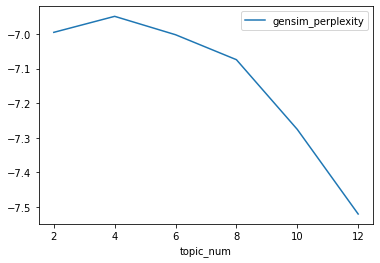

In [33]:
# result = pd.DataFrame(result)
# result.plot.line(x='topic_num', y='gensim_perplexity', label='gensim_perplexity')
# result

,topic_num,gensim_perplexity,perplexity
0,2,-6.994831,1090.979302
1,4,-6.948481,1041.566721
2,6,-7.001723,1098.524768
3,8,-7.073958,1180.811971
4,10,-7.275728,1444.802642
5,12,-7.520683,1845.827325


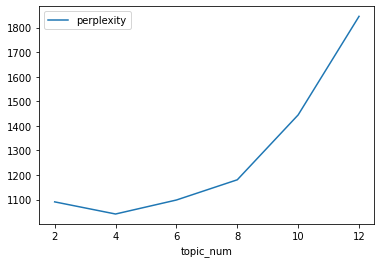

In [34]:
# result = pd.DataFrame(result)
# result.plot.line(x='topic_num', y='perplexity', label='perplexity')
# result

In [15]:
# 儲存LDA_result
# result.to_csv("./result/LDA_cn_desc_p_s_2500.csv", index=False)

## 找出文章topic

In [19]:
best_num = result[result.perplexity == min(result.perplexity)]["topic_num"].values[0]

In [20]:
ldamodel = gensim.models.ldamulticore.LdaMulticore(
        corpus = corpus,
        num_topics = best_num ,
        id2word=id2word,
        random_state = 1500,
        passes=5,
        iterations=2000
        )

In [21]:
# 取得每個文章的主題分佈
topics_doc = ldamodel.get_document_topics(corpus, minimum_probability=0.000001) 

In [25]:
c = [i[1] for i in topics_doc[0]]
c.index(max(c)) 

3

In [26]:
topics_cn = [] 
for topics in topics_doc:
    c = [i[1] for i in topics]
    topics_cn.append(c.index(max(c)))

In [27]:
topics_cn

[3,
 8,
 4,
 10,
 8,
 11,
 10,
 11,
 5,
 13,
 9,
 10,
 3,
 14,
 12,
 11,
 12,
 3,
 8,
 3,
 5,
 9,
 12,
 9,
 10,
 12,
 3,
 3,
 8,
 5,
 9,
 8,
 11,
 10,
 10,
 9,
 8,
 15,
 14,
 8,
 9,
 4,
 8,
 12,
 13,
 8,
 14,
 13,
 13,
 14,
 14,
 15,
 10,
 5,
 5,
 4,
 14,
 13,
 14,
 13,
 0,
 5,
 5,
 3,
 5,
 9,
 16,
 12,
 8,
 3,
 13,
 11,
 4,
 3,
 4,
 5,
 0,
 3,
 9,
 11,
 11,
 11,
 13,
 3,
 14,
 4,
 11,
 5,
 8,
 4,
 2,
 13,
 8,
 4,
 9,
 10,
 9,
 11,
 10,
 9,
 8,
 10,
 14,
 11,
 5,
 5,
 3,
 14,
 10,
 8,
 5,
 2,
 9,
 11,
 13,
 12,
 8,
 4,
 14,
 11,
 14,
 13,
 9,
 5,
 8,
 10,
 4,
 14,
 5,
 16,
 12,
 9,
 4,
 11,
 8,
 14,
 11,
 10,
 9,
 9,
 4,
 5,
 10,
 13,
 3,
 3,
 5,
 3,
 3,
 8,
 12,
 12,
 10,
 3,
 15,
 10,
 3,
 5,
 14,
 14,
 15,
 14,
 13,
 5,
 3,
 13,
 13,
 3,
 1,
 13,
 0,
 6,
 6,
 15,
 3,
 3,
 8,
 10,
 8,
 4,
 13,
 13,
 4,
 5,
 1,
 15,
 12,
 1,
 8,
 14,
 8,
 3,
 14,
 5,
 4,
 13,
 4,
 5,
 9,
 14,
 5,
 13,
 10,
 3,
 5,
 9,
 14,
 3,
 4,
 5,
 10,
 8,
 16,
 10,
 8,
 13,
 13,
 13,
 4,
 3,
 12,
 11,
 5,
 10,
 1

In [28]:
print(len(topics_cn))
print(len(cn_desc))

7692
7692


## 找出對應的patent編號和公司

In [51]:
mongoURI = "mongodb://%s:%s@%s/%s?authMechanism=SCRAM-SHA-1" % ("eva", "eva_30241", "140.117.69.70:30241", "eva")

try:
    conn = pymongo.MongoClient(mongoURI)
    db = conn.eva
    # db_rm_us = db.rm_patent_us
    # db_rm_cn = db.rm_patent_cn
    # db_rm_de = db.rm_patent_de
    
    # db_rm_us_2020 = db.rm_patent_us_2020
    db_rm_cn_2020 = db.rm_patent_cn_2020
    # db_rm_de_2020 = db.rm_patent_de_2020
except errors.ConnectionFailure as err:
    print(err)

In [52]:
# data_cn_desc = p_db_cn.find({}, {"patentNumber":1, "brief": 1})
data_cn_desc = db_rm_cn_2020.find({}, {"patentNumber":1, "brief": 1, "current_assignee":1})

ls_id = []
ls_pNo = []
ls_com = []
ls_desc = []
for data in data_cn_desc:
    # print(data["_id"],data["count"])
    ls_id.append(data["_id"])
    ls_pNo.append(data["patentNumber"])
    ls_com.append(data["current_assignee"])
    ls_desc.append(data["brief"])
    

In [53]:
# df_cn = pd.DataFrame((zip(ls_id, ls_pNo, ls_desc)), columns = ['id', 'patentNumber', 'brief'])
df_cn = pd.DataFrame((zip(ls_id, ls_pNo, ls_com, ls_desc)), columns = ['id', 'patentNumber', 'company', 'brief'])

In [54]:
df_cn

,id,patentNumber,company,brief
0,61ffe131f4d57576a502c4bf,CN112187940A,[Zhejiang College of Security Technology],本发明提供了一种基于物联网的安防监控系统，包括：现场参数检测网络、系统健康自检单元、视频智能...
1,61ffe143f4d57576a502c4d3,CN112364317A,[Communication University of China],本发明涉及一种基于区块链技术的物联网雾环境管理架构及方法，物联网雾环境管理架构至少包括由物联...
2,61ffe14df4d57576a502c4d5,CN113508066A,[Intel Corp],根据一个实施例，设备包括用于接收来自自主交通工具的多个传感器的传感器数据的接口。该设备还包括...
3,61ffe14ef4d57576a502c4d7,CN213399967U,[Jiangsu Aikeqing Transportation Technology Co...,本实用新型具体涉及一种城市公共设施资产管理系统，本城市公共设施资产管理系统包括：公共设施运行...
4,61ffe181f4d57576a502c50b,CN111382190B,[Tencent Technology Shenzhen Co Ltd],本发明实施例公开了一种基于智能的对象推荐方法、装置和存储介质；本发明实施例可以根据用户针对对...
...,...,...,...,...
7687,620072d9f4d57576a50387db,CN111935889A,[Guilin Xintong Technology Co ltd],本发明公开了一种路灯自动采集及远程控制装置，该装置包括控制模块和分别与控制模块相连接的采集模...
7688,620072d9f4d57576a50387dd,CN212660357U,[Guilin Xintong Technology Co ltd],本发明公开了一种路灯自动采集及远程控制装置，该装置包括控制模块和分别与控制模块相连接的采集模...
7689,620072dff4d57576a50387eb,CN111353035B,[Mgjia Beijing Technology Co ltd],本公开涉及一种人机对话方法、装置、可读存储介质及电子设备。方法包括：在接收到用户当前输入的文...
7690,620072f3f4d57576a5038803,CN211184794U,[Bizlink International Corp],本实用新型为一种具有鳍片组的连接器，为电子装置的散热模组，其包含一外壳、一电路板、一热扩散件...


In [55]:
print(len(df_cn))
print(len(cn_desc))

7692
7692


In [56]:
df_cn["topic"]=topics_cn

In [57]:
df_cn

,id,patentNumber,company,brief,topic
0,61ffe131f4d57576a502c4bf,CN112187940A,[Zhejiang College of Security Technology],本发明提供了一种基于物联网的安防监控系统，包括：现场参数检测网络、系统健康自检单元、视频智能...,3
1,61ffe143f4d57576a502c4d3,CN112364317A,[Communication University of China],本发明涉及一种基于区块链技术的物联网雾环境管理架构及方法，物联网雾环境管理架构至少包括由物联...,8
2,61ffe14df4d57576a502c4d5,CN113508066A,[Intel Corp],根据一个实施例，设备包括用于接收来自自主交通工具的多个传感器的传感器数据的接口。该设备还包括...,4
3,61ffe14ef4d57576a502c4d7,CN213399967U,[Jiangsu Aikeqing Transportation Technology Co...,本实用新型具体涉及一种城市公共设施资产管理系统，本城市公共设施资产管理系统包括：公共设施运行...,10
4,61ffe181f4d57576a502c50b,CN111382190B,[Tencent Technology Shenzhen Co Ltd],本发明实施例公开了一种基于智能的对象推荐方法、装置和存储介质；本发明实施例可以根据用户针对对...,8
...,...,...,...,...,...
7687,620072d9f4d57576a50387db,CN111935889A,[Guilin Xintong Technology Co ltd],本发明公开了一种路灯自动采集及远程控制装置，该装置包括控制模块和分别与控制模块相连接的采集模...,11
7688,620072d9f4d57576a50387dd,CN212660357U,[Guilin Xintong Technology Co ltd],本发明公开了一种路灯自动采集及远程控制装置，该装置包括控制模块和分别与控制模块相连接的采集模...,11
7689,620072dff4d57576a50387eb,CN111353035B,[Mgjia Beijing Technology Co ltd],本公开涉及一种人机对话方法、装置、可读存储介质及电子设备。方法包括：在接收到用户当前输入的文...,12
7690,620072f3f4d57576a5038803,CN211184794U,[Bizlink International Corp],本实用新型为一种具有鳍片组的连接器，为电子装置的散热模组，其包含一外壳、一电路板、一热扩散件...,10


In [58]:
df_cn2 = df_cn.explode('company')
df_cn2

,id,patentNumber,company,brief,topic
0,61ffe131f4d57576a502c4bf,CN112187940A,Zhejiang College of Security Technology,本发明提供了一种基于物联网的安防监控系统，包括：现场参数检测网络、系统健康自检单元、视频智能...,3
1,61ffe143f4d57576a502c4d3,CN112364317A,Communication University of China,本发明涉及一种基于区块链技术的物联网雾环境管理架构及方法，物联网雾环境管理架构至少包括由物联...,8
2,61ffe14df4d57576a502c4d5,CN113508066A,Intel Corp,根据一个实施例，设备包括用于接收来自自主交通工具的多个传感器的传感器数据的接口。该设备还包括...,4
3,61ffe14ef4d57576a502c4d7,CN213399967U,Jiangsu Aikeqing Transportation Technology Co ltd,本实用新型具体涉及一种城市公共设施资产管理系统，本城市公共设施资产管理系统包括：公共设施运行...,10
4,61ffe181f4d57576a502c50b,CN111382190B,Tencent Technology Shenzhen Co Ltd,本发明实施例公开了一种基于智能的对象推荐方法、装置和存储介质；本发明实施例可以根据用户针对对...,8
...,...,...,...,...,...
7688,620072d9f4d57576a50387dd,CN212660357U,Guilin Xintong Technology Co ltd,本发明公开了一种路灯自动采集及远程控制装置，该装置包括控制模块和分别与控制模块相连接的采集模...,11
7689,620072dff4d57576a50387eb,CN111353035B,Mgjia Beijing Technology Co ltd,本公开涉及一种人机对话方法、装置、可读存储介质及电子设备。方法包括：在接收到用户当前输入的文...,12
7690,620072f3f4d57576a5038803,CN211184794U,Bizlink International Corp,本实用新型为一种具有鳍片组的连接器，为电子装置的散热模组，其包含一外壳、一电路板、一热扩散件...,10
7691,620072f3f4d57576a5038805,CN212213883U,Nanfang Hospital,本实用新型涉及一种智能急救推车，属于医疗器械领域，包括箱体，所述箱体底部设有滑轮，所述箱体上...,2


In [59]:
# 排名前16的公司
c_ls = list(df_cn2.groupby("company",as_index=False).size().sort_values("size",ascending=False).head(16).company)
c_ls

['Huawei Technologies Co Ltd',
 'Apple Inc',
 'Shanghai Langbo Communication Technology Co Ltd',
 'Samsung Electronics Co Ltd',
 'Intel Corp',
 'China United Network Communications Group Co Ltd',
 'China Mobile Communications Group Co Ltd',
 'State Grid Corp of China SGCC',
 'LG Electronics Inc',
 'Beijing Sankuai Online Technology Co Ltd',
 'Tencent Technology Shenzhen Co Ltd',
 'Telefonaktiebolaget LM Ericsson AB',
 'China Mobile IoT Co Ltd',
 'Alipay Hangzhou Information Technology Co Ltd',
 'Beijing Xiaomi Mobile Software Co Ltd',
 'Beijing ByteDance Network Technology Co Ltd']

### 轉成company-topic 的總數表格

In [60]:
df_cn_count = df_cn2.groupby(["company","topic"],as_index=False).size()
df_cn_count

,company,topic,size
0,1230 Intelligent Technology Haian Co ltd,13,1
1,720 Health Beijing Itech Health Co ltd,11,1
2,AGC Glass Europe SA,2,2
3,AGC Inc,2,2
4,ANHUI MINSHENG INFORMATION CORP,5,1
...,...,...,...
5513,Ziguang Zhanrui Chongqing Technology Co ltd,6,1
5514,Ziguang Zhanrui Chongqing Technology Co ltd,8,2
5515,Ziguang Zhanrui Chongqing Technology Co ltd,9,1
5516,Ziguang Zhanrui Chongqing Technology Co ltd,15,11


In [61]:
# 轉成company-topic 的總數表格
table_cn = df_cn_count.pivot_table(index='company', values='size', columns='topic',aggfunc=['sum']).fillna(0).reset_index()
table_cn = table_cn.droplevel(level=0, axis=1)
table_cn = table_cn.rename(columns={'':'company'})

In [62]:
table_cn

topic,company,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1230 Intelligent Technology Haian Co ltd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,720 Health Beijing Itech Health Co ltd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,AGC Glass Europe SA,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AGC Inc,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ANHUI MINSHENG INFORMATION CORP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583,Ziasiot Shanghai Iot Technology Co ltd,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3584,Zibo Billion Electron Co ltd,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3585,Zibo Vocational Institute,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3586,Ziguang Zhanrui Chongqing Technology Co ltd,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0


In [63]:
final_table_cn = table_cn[table_cn.company.isin(c_ls)]
final_table_cn

topic,company,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
27,Alipay Hangzhou Information Technology Co Ltd,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,10.0,12.0,3.0,0.0,0.0,9.0,1.0,3.0,0.0
91,Apple Inc,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,139.0,0.0
150,Beijing ByteDance Network Technology Co Ltd,0.0,9.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,12.0,0.0,1.0,1.0,0.0,10.0,0.0
244,Beijing Sankuai Online Technology Co Ltd,1.0,0.0,0.0,4.0,1.0,1.0,0.0,5.0,13.0,5.0,6.0,2.0,4.0,4.0,1.0,4.0,0.0
284,Beijing Xiaomi Mobile Software Co Ltd,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,35.0,0.0
498,China Mobile Communications Group Co Ltd,0.0,2.0,1.0,5.0,8.0,5.0,1.0,3.0,2.0,1.0,1.0,10.0,6.0,7.0,2.0,7.0,1.0
506,China Mobile IoT Co Ltd,0.0,4.0,0.0,2.0,7.0,5.0,0.0,2.0,1.0,1.0,1.0,10.0,4.0,4.0,2.0,0.0,1.0
530,China United Network Communications Group Co Ltd,0.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,4.0,0.0,56.0,0.0
1283,Huawei Technologies Co Ltd,0.0,12.0,4.0,6.0,2.0,2.0,18.0,2.0,21.0,5.0,11.0,6.0,0.0,19.0,1.0,230.0,0.0
1404,Intel Corp,0.0,5.0,4.0,1.0,2.0,0.0,3.0,3.0,2.0,22.0,1.0,2.0,1.0,3.0,4.0,33.0,0.0


In [64]:
final_table_cn.shape

(16, 18)

In [66]:
table_cn.to_csv('company_lda_brief_cn_2020.csv',index=0)